In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [2]:
df = yf.download('WMT', start='2019-01-01', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


(array([  2.,   1.,  12.,  98., 502., 124.,   9.,   3.,   4.,   1.]),
 array([-9.74557495, -7.59741592, -5.4492569 , -3.30109787, -1.15293884,
         0.99522018,  3.14337921,  5.29153824,  7.43969727,  9.58785629,
        11.73601532]),
 <BarContainer object of 10 artists>)

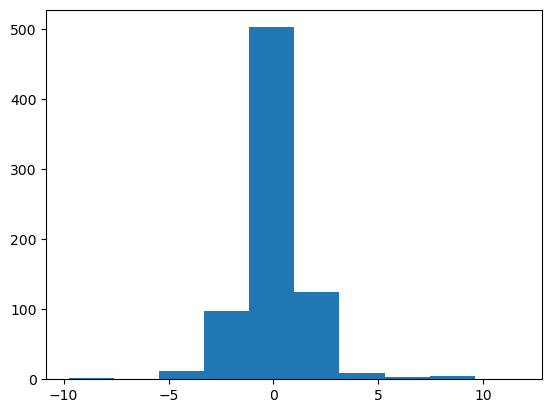

In [3]:
prices = df['Adj Close'].to_numpy()
plt.hist(df['Adj Close'].diff(1))

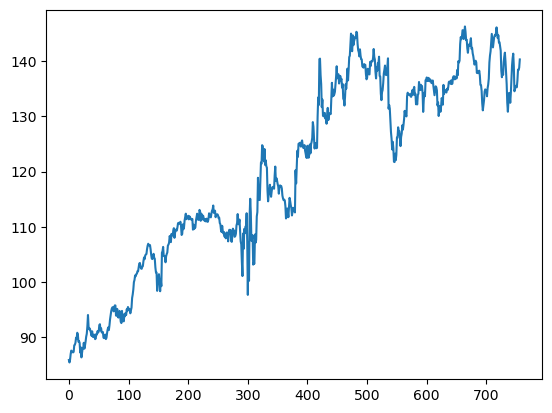

In [4]:
plt.plot(prices)

In [5]:
incd = np.diff(prices) / prices[:-1] 
sigma = incd.std() * np.sqrt(252)
mu = incd.mean() * 252

N = 4	               # Quarters
S = prices[0]          # Start price
K = prices[0]          # Strike price
u = np.exp(sigma)      # Up gain
d = 1 / u              # Down loss
R = 1 + .05            # Risk free profit
p = (R - d) / (u - d)  # Probability of gain

In [6]:
print(f'S {S}\nK {K}\nu {u}\nd {d}\np {p}')

S 85.89545440673828
K 85.89545440673828
u 1.248471755180879
d 0.8009792739404983
p 0.5564802460350939


In [7]:
def binomCall(price, i=1, route=''):
    print(f"{route if route != '' else 'start'}: {price}")

    if i >= N:
        return max(price - K, 0)

    U = binomCall(price * u, i+1, route + 'u')
    D = binomCall(price * d, i+1, route + 'd')

    return 1 / R * (U * p +  D * (1-p))


def binomPut(price, i=1, route=''):
    print(f"{route if route != '' else 'start'}: {price}")

    if i >= N:
        return max(K - price, 0)

    U = binomPut(price * u, i+1, route + 'u')
    D = binomPut(price * d, i+1, route + 'd')

    return 1 / R * (U * p +  D * (1-p))

In [8]:
C = binomCall(S)
print(f'Premium Call {C}')

start: 85.89545440673828
u: 107.23804872523971
uu: 133.88367491417264
uuu: 167.14998661016335
uud: 107.23804872523971
ud: 85.89545440673828
udu: 107.23804872523971
udd: 68.8004787054984
d: 68.8004787054984
du: 85.8954544067383
duu: 107.23804872523974
dud: 68.80047870549842
dd: 55.107757480288825
ddu: 68.8004787054984
ddd: 44.14017157505081
Premium Call 19.692134032336167


In [9]:
P = binomPut(S)
print(f'Premim Put {P}')

start: 85.89545440673828
u: 107.23804872523971
uu: 133.88367491417264
uuu: 167.14998661016335
uud: 107.23804872523971
ud: 85.89545440673828
udu: 107.23804872523971
udd: 68.8004787054984
d: 68.8004787054984
du: 85.8954544067383
duu: 107.23804872523974
dud: 68.80047870549842
dd: 55.107757480288825
ddu: 68.8004787054984
ddd: 44.14017157505081
Premim Put 7.996402685084572


In [10]:
print(f'{round(S - K / np.power(R, N-1), 3)} : {round(C - P, 3)}')    # Parity formula

11.696 : 11.696


In [11]:
d1 =  np.log((K / S - mu / N) / (sigma * np.sqrt(N)))

C = S * norm.cdf(d1 + sigma * np.sqrt(N)) - K * norm.cdf(d1)

print(f'Black Scholes formula: {C}')

Black Scholes formula: 9.350946327256253
